**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [3]:
txt_fdiry = file.path(FD_RES, "assay_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

MPRA_Tiling_K562_Tewhey_hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_WHG_K562_Reddy_A001 


In [4]:
VEC_TXT_ASSAY = c(
    "STARR_ATAC_K562_Reddy_KS91",
    "STARR_ATAC_K562_Reddy_KS274"#,
    #"STARR_WHG_K562_Reddy_A001"
)

In [6]:
for (txt_assay in VEC_TXT_ASSAY) {
    txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "fragment_counts", "summary")
    vec = dir(txt_fdiry)
    cat(txt_assay, "\n")
    print(vec)
    cat("\n")
}

STARR_ATAC_K562_Reddy_KS91 
[1] "metadata.library_size.tsv" "metadata.tsv"             
[3] "result.library_size.csv"  

STARR_ATAC_K562_Reddy_KS274 
[1] "metadata.library_size.tsv" "metadata.tsv"             
[3] "result.library_size.csv"  



In [26]:
lst = lapply(VEC_TXT_ASSAY, function(txt_assay) {

    ###
    txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "fragment_counts", "summary")
    txt_fname = "metadata.library_size.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    dat = dat %>% dplyr::rename(Lib_Size = Size)
    dat_meta_lib = dat
    
    ###
    txt_fglob = file.path(
        FD_RES, "assay_fcc", txt_assay, "coverage", 
        "fcc_astarr_macs", 
        "*"
    )
    vec_txt_fdiry = Sys.glob(txt_fglob)

    lst = lapply(vec_txt_fdiry, function(txt_fdiry){
        print(txt_fdiry)

        txt_label = basename(txt_fdiry)
        txt_fname = "result.size.csv"
        txt_fpath = file.path(
            txt_fdiry, 
            "overlap_unique", 
            "summary", 
            txt_fname)

        dat = read_csv(txt_fpath, col_names = FALSE, show_col_types = FALSE)
        colnames(dat) = c("FName", "Size")
        dat$Label = txt_label
        
        return(dat)
    })
    
    dat = bind_rows(lst)
    dat = dat %>% dplyr::left_join(dat_meta_lib, by="FName")
    
    return(dat)
})

[1] "/mount/repo/Proj_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS91/coverage/fcc_astarr_macs/astarr_macs_input_overlap"
[1] "/mount/repo/Proj_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS91/coverage/fcc_astarr_macs/astarr_macs_input_union"
[1] "/mount/repo/Proj_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS274/coverage/fcc_astarr_macs/astarr_macs_input_overlap"
[1] "/mount/repo/Proj_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS274/coverage/fcc_astarr_macs/astarr_macs_input_union"


In [29]:
dat = bind_rows(lst)
dat = dat %>% dplyr::mutate(Prop = Size / Lib_Size)
dat

FName,Size,Label,Assay,Prefix,Group,Sample,Lib_Size,Prop
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
ASTARRseq_K562_KS91.hg38.Input.rep1.WGS.unstranded.bed.gz,118212222,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep1,348695063,0.3390132
ASTARRseq_K562_KS91.hg38.Input.rep2.WGS.unstranded.bed.gz,149512330,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep2,451369741,0.3312414
ASTARRseq_K562_KS91.hg38.Input.rep3.WGS.unstranded.bed.gz,159858862,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep3,487579055,0.3278624
ASTARRseq_K562_KS91.hg38.Input.rep4.WGS.unstranded.bed.gz,150695534,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep4,456246254,0.3302943
ASTARRseq_K562_KS91.hg38.Input.rep5.WGS.unstranded.bed.gz,147294367,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep5,444268950,0.3315432
ASTARRseq_K562_KS91.hg38.Input.rep6.WGS.unstranded.bed.gz,133574079,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep6,397333562,0.3361762
ASTARRseq_K562_KS91.hg38.Output.rep1.WGS.unstranded.bed.gz,17037803,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep1,44103844,0.3863111
ASTARRseq_K562_KS91.hg38.Output.rep2.WGS.unstranded.bed.gz,34350606,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep2,97471282,0.3524177
ASTARRseq_K562_KS91.hg38.Output.rep3.WGS.unstranded.bed.gz,30672298,astarr_macs_input_overlap,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep3,84103298,0.3646979


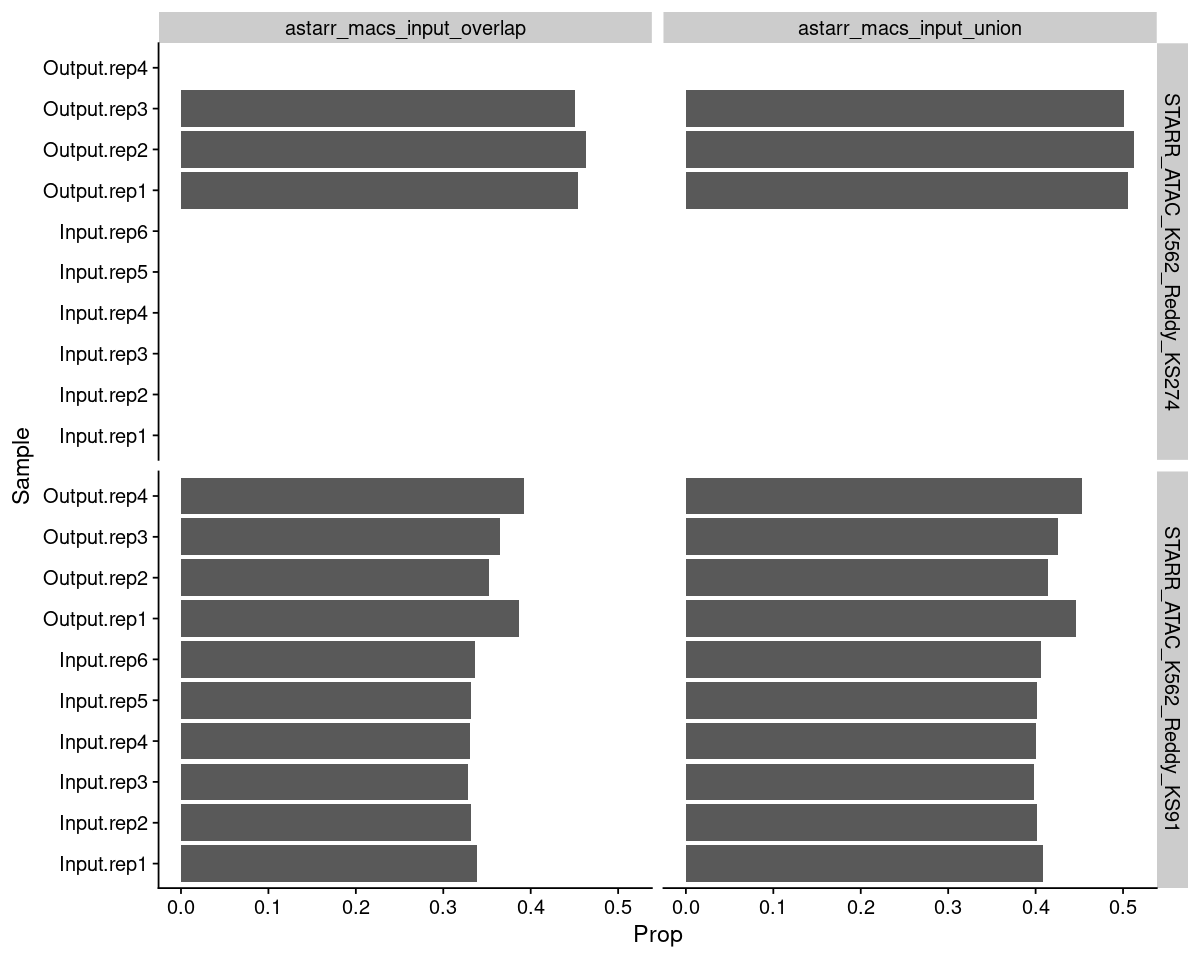

In [35]:
gpt = ggplot(dat, aes(x=Sample, y=Prop)) + 
    geom_col() + 
    coord_flip() +
    theme_cowplot() +
    facet_grid(Assay~Label)

options(repr.plot.width=10, repr.plot.height=8)
print(gpt)

In [ ]:
for (txt_assay in VEC_TXT_ASSAY) {
    ###
    txt_fdiry = file.path(FD_RES, "assay_fcc", txt_assay, "fragment_counts", "summary")
    txt_fname = "metadata.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    dat_meta  = read_tsv(txt_fpath, show_col_types = FALSE)

    ###
    txt_fname = "result.library_size.csv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    dat_size  = read_csv(txt_fpath, col_names = FALSE, show_col_types = FALSE)
    colnames(dat_size) = c("FName", "Size")

    ###
    dat = dplyr::left_join(dat_meta, dat_size, by="FName")

    ###
    txt_fname = "metadata.library_size.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    write_tsv(dat, txt_fpath)
    
    ###
    fun_display_table(dat_meta)
    flush.console()
    fun_display_table(dat_size)
    flush.console()
    fun_display_table(dat)
    flush.console()
}